<a href="https://colab.research.google.com/github/Statistically-Inclined/Complete-ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

Load MNIST Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Reshaping the dataset

In [ ]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


### Normalization

In [ ]:
X_train = X_train/255
X_test = X_test/255

### CNN Model

In [ ]:
# defining model
model=Sequential()

# adding convolution layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

# adding pooling layer
model.add(MaxPool2D(2,2))

# adding fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))

# adding output layer
model.add(Dense(10,activation='softmax'))

# compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# summary
model.summary()

# fitting the model
model.fit(X_train,y_train,epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
y_test_pred

array([[7.37265197e-12, 4.58192068e-10, 8.45398543e-11, ...,
        1.00000000e+00, 2.01780311e-11, 1.17826291e-08],
       [5.26222919e-11, 2.50863991e-07, 9.99999762e-01, ...,
        1.15915185e-17, 4.20373478e-16, 1.12558420e-13],
       [1.11732110e-10, 1.00000000e+00, 1.40307536e-12, ...,
        1.40853140e-09, 3.83324789e-10, 4.94086705e-13],
       ...,
       [2.74907169e-18, 1.53824349e-15, 3.36765131e-20, ...,
        1.60120669e-13, 6.66491307e-10, 4.26532030e-12],
       [5.54565623e-18, 3.91412946e-16, 6.26950842e-21, ...,
        4.25310318e-19, 3.70328088e-08, 2.68568650e-18],
       [3.44193871e-14, 2.84372542e-14, 8.97136534e-16, ...,
        9.54535024e-22, 6.34440471e-13, 8.19953639e-20]], dtype=float32)

In [ ]:
y_test_pred.shape

(10000, 10)

In [ ]:
y_test_prediction = (y_test_pred > 0.5)
y_test_prediction

array([[False, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
y_test_prediction.shape

(10000, 10)

In [ ]:
y_test_prediction[0]

array([False, False, False, False, False, False, False,  True, False,
       False])

In [ ]:
y_test_prediction_binary = y_test_prediction.astype(int)

In [ ]:
y_test_prediction_binary

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import numpy as np
y_test_prediction_decmal = np.argmax(y_test_prediction_binary, 1)

In [ ]:
y_test_prediction_decmal

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_test.shape

(10000,)

In [ ]:
# evaluting the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0597 - accuracy: 0.9871


[0.05973657965660095, 0.9871000051498413]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_test, y_test_prediction_decmal)
accuracy = accuracy_score(y_test, y_test_prediction_decmal)
class_report = classification_report(y_test, y_test_prediction_decmal)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

accuracy: 0.987
classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



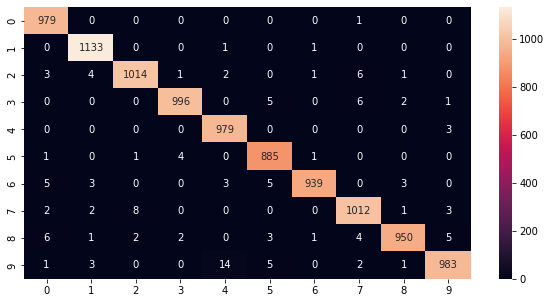

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='g')